<a href="https://colab.research.google.com/github/Vimal06Pal/dog-and-cat-classifier/blob/master/image_classificatn_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

## Importing keras

In [0]:
import keras

Using TensorFlow backend.


## Import Cifar10 dataset from keras

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


# Loading the data into training and test set

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

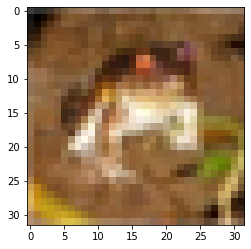

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train.max()

255

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
from keras.utils import to_categorical

In [0]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

### Building the model

Importing the Keras libraries and packages

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
### Initialising the CNN
model=Sequential()

#Step 1 - Convolution
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

#Step 2 - Pooling
model.add(MaxPool2D(pool_size=(2,2)))

#Adding a second convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Step 3 - Flattening
model.add(Flatten())

#Step 4 - Full connection
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

#Compiling the CNN
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


#Summaary of the model


In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

## Fitting the CNN

In [16]:
model.fit(x_train,y_cat_train,verbose=1,epochs=25)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/25





50000/50000 [==============================] - 18s 369us/step - loss: 1.5120 - acc: 0.4605
Epoch 2/25
50000/50000 [==============================] - 12s 240us/step - loss: 1.1733 - acc: 0.5873
Epoch 3/25
50000/50000 [==============================] - 12s 247us/step - loss: 1.0218 - acc: 0.6456
Epoch 4/25
50000/50000 [==============================] - 12s 239us/step - loss: 0.9197 - acc: 0.6852
Epoch 5/25
50000/50000 [==============================] - 12s 239us/step - loss: 0.8454 - acc: 0.7107
Epoch 6/25
50000/50000 [==============================] - 12s 239us/step - loss: 0.7891 - acc: 0.7312
Epoch 7/25
50000/50000 [==============================] - 12s 240us/step - loss: 0.7398 - acc: 0.7490
Epoch 8/25
50000/50000 [==============================] - 12s 240us/step - loss: 0.7042 - acc: 0.7640
Epoch 9/25
50000/50000 [==============================] - 12s 241us/step - loss: 0

# Evaluation of model on Test set

In [17]:
model.metrics_names

['loss', 'acc']

In [18]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 109us/step


[1.779875578403473, 0.6623]

In [0]:
from sklearn.metrics import classification_report

In [0]:
pred=model.predict_classes(x_test)

# classification report helps to evaluate the accuracy of each class

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69      1000
           1       0.81      0.77      0.79      1000
           2       0.54      0.61      0.57      1000
           3       0.47      0.50      0.48      1000
           4       0.69      0.52      0.59      1000
           5       0.61      0.51      0.55      1000
           6       0.78      0.73      0.76      1000
           7       0.59      0.82      0.68      1000
           8       0.81      0.74      0.77      1000
           9       0.68      0.79      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

